# Итоговый проект по курсу основы языка Python для аналитиков

## Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices
**ссылка в домашнем задании на сайте GB не верна**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./extra/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1.2 Изучите стоимости недвижимости

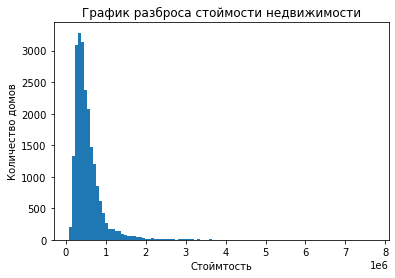

In [3]:
plt.hist(df['price'], bins=100)
plt.title('График разброса стоймости недвижимости')
plt.xlabel('Стоймтость')
plt.ylabel('Количество домов');

In [4]:
data = df['price'].value_counts().reset_index().sort_values(by='index')

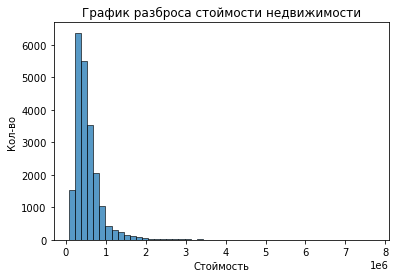

In [5]:
plt.figure(figsize=(6, 4))

sns.histplot(df['price'], bins=50)

plt.title('График разброса стоймости недвижимости')
plt.xlabel('Стоймость')
plt.ylabel('Кол-во');

In [6]:
data = df.groupby('price')['id'].agg(count='count').reset_index().sort_values(by='price')
data

,price,count
0,75000.0,1
1,78000.0,1
2,80000.0,1
3,81000.0,1
4,82000.0,1
...,...,...
4023,5350000.0,1
4024,5570000.0,1
4025,6885000.0,1
4026,7062500.0,1


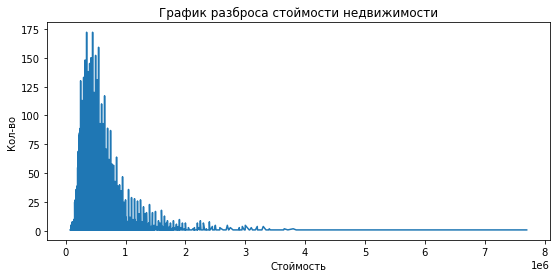

In [7]:
plt.figure(figsize=(9, 4))

plt.plot(data['price'], data['count'])
plt.title('График разброса стоймости недвижимости')
plt.xlabel('Стоймость')
plt.ylabel('Кол-во');

### Выводы
На графиках видно, что большенство домов имеют небольшую стоймость относительно остальных домов.

### 1.3 Изучите распределение квадратуры жилой площади

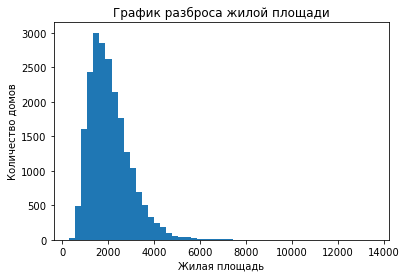

In [8]:
plt.hist(df['sqft_living'], bins=50)
plt.title('График разброса жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов');

### Выводы
На графиках видно, что большенство домов имеют жилую площадь примерно равную 2000 - 2500

### 2.1.4 Изучите распределение года постройки

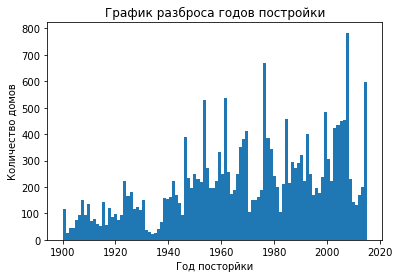

In [9]:
plt.hist(df['yr_built'], bins=100)
plt.title('График разброса годов постройки')
plt.xlabel('Год посторйки')
plt.ylabel('Количество домов');

### Выводы
На графиках видно, что идёт слабая тенденция на омоложение домового фонда

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную

In [10]:
data = df['waterfront'].value_counts()
data.index = ['без вида','с видом']
data.head()

без вида    21450
с видом       163
Name: waterfront, dtype: int64

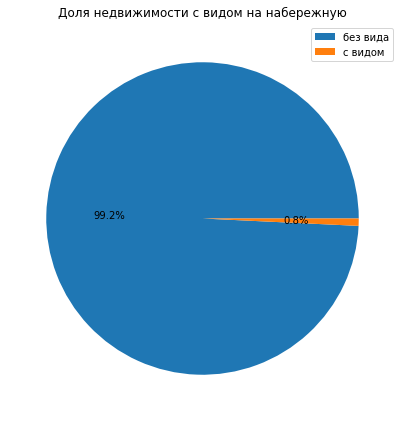

In [11]:
# Строим круговую диаграмму

plt.figure(figsize=(7, 9))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля недвижимости с видом на набережную')
plt.legend(data.index);

In [12]:
data = pd.crosstab(df['view'], df['waterfront'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)

''

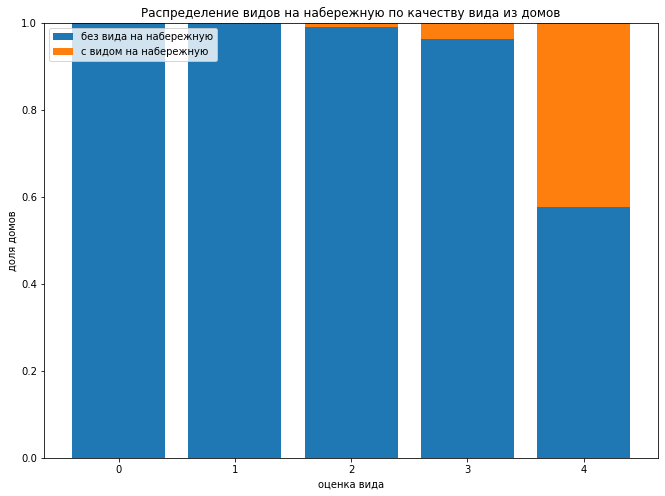

In [13]:
plt.figure(figsize=(11, 8))

plt.bar(data['view'], data['no'])
plt.bar(data['view'], data['yes'], bottom=data['no'])

plt.title('Распределение видов на набережную по качеству вида из домов')
plt.xlabel('оценка вида')
plt.ylabel('доля домов')
plt.legend(['без вида на набережную', 'с видом на набережную'])
;

### Выводы
На графиках видно, что у подавляющего большенства домов нет вида на набережную. Но дома с видом на набережную чаще получают лучшие оценки вида.

### 2.2 Изучите распределение этажей домов

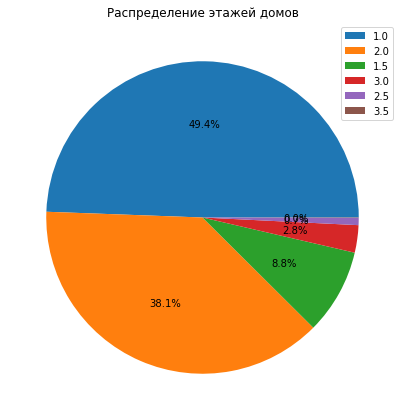

In [14]:
data = df['floors'].value_counts()
plt.figure(figsize=(7, 9))

plt.pie(data, autopct='%1.1f%%')

plt.title('Распределение этажей домов')
plt.legend(data.index);

### Выводы
На графиках видно, что у половины домов только 1 этаж, а у другой половины большинсто домов имеют 2 этажа

### 2.2 Изучите распределение состояния домов

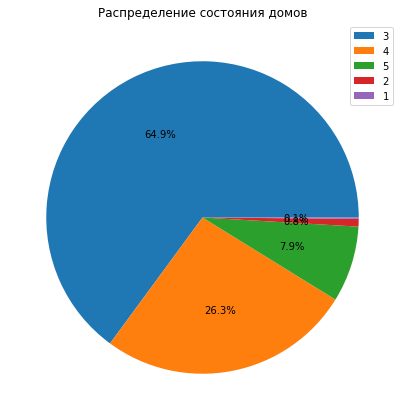

In [15]:
data = df['condition'].value_counts()
plt.figure(figsize=(7, 9))

plt.pie(data, autopct='%1.1f%%')

plt.title('Распределение состояния домов')
plt.legend(data.index);

### Выводы
Согластно графику, большенство домов находитстся в удовлетворительном состоянии. Очень мало домов в плачевном состоянии. 

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 3.1 Построим матрицу корреляции для всего датасета и изучим какие есть линейные зависимоси у стоймости жилья

In [16]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


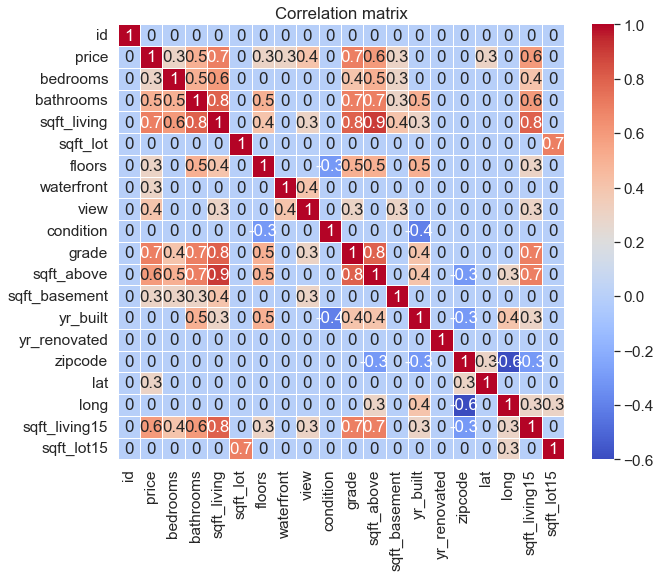

In [17]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Выводы
Изучая матрицу корреляций по параметру цены на недвижимость можем заметить сильные линейные связи с колличеством ванных комнат, размерами жилой площади, общей площади дома, уровнем оценки и средней жилой площади у 15 соседей. Также, отметим менее сильные линейные зависимости от колличества спален в доме, количества этажей, вида на набережную, наличия подвала и от широты расположения недвижимости. Отрицательных линейных зависимостей не наблюдается.

<Figure size 720x720 with 0 Axes>

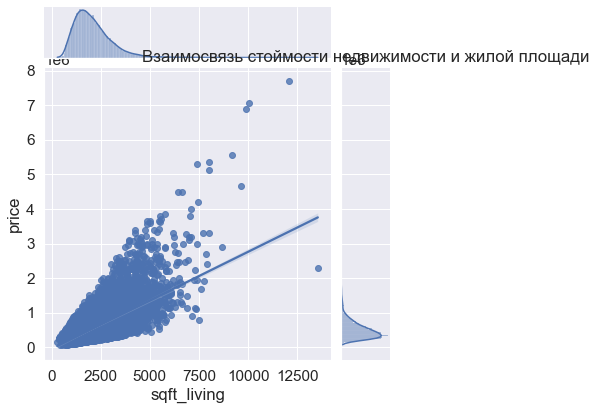

In [18]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=df['sqft_living'],y = df['price'], kind='reg')
plt.title('Взаимосвязь стоймости недвижимости и жилой площади');

### Выводы
Наблюдаем прямую линейную зависимость стоймости недвижимости от размера жилой площади. На графике видны некоторые выбросы которые могут являться ошибками в данных.

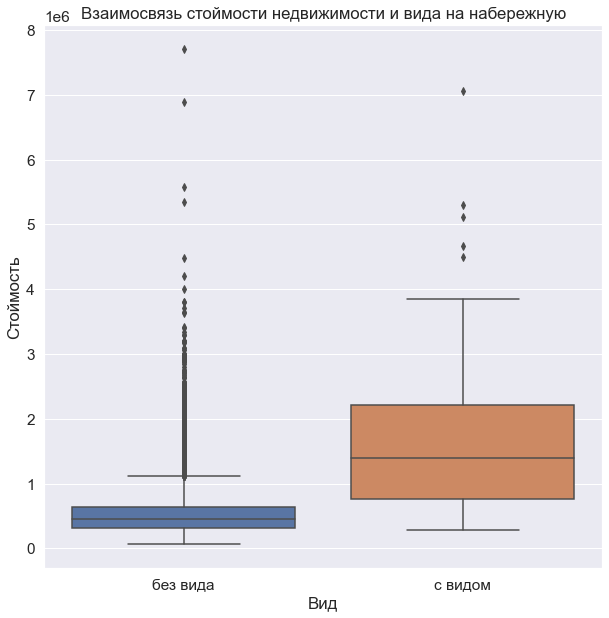

In [19]:
plt.figure(figsize=(10, 10))
sns.boxplot(x= df['waterfront'],y = df['price'] )
plt.title('Взаимосвязь стоймости недвижимости и вида на набережную')
plt.xlabel('Вид')
plt.ylabel('Стоймость')
plt.xticks([0, 1], ['без вида', 'с видом']);

### Выводы
На графике видно, что медианная цена на дома с видом на набережную гораздо выше аналогичной цене дома без такого вида. 

<Figure size 720x720 with 0 Axes>

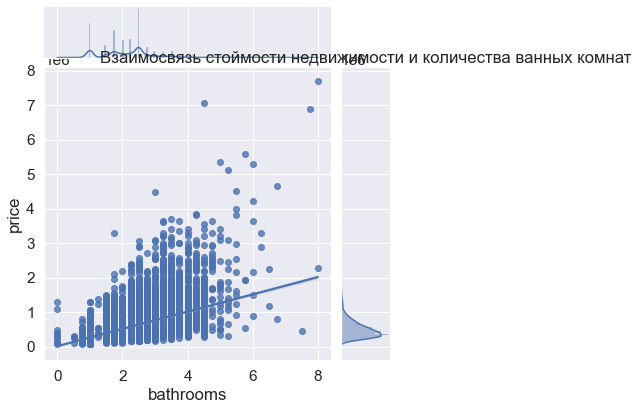

In [20]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=df['bathrooms'],y = df['price'], kind='reg');
plt.title('Взаимосвязь стоймости недвижимости и количества ванных комнат');

### Выводы
Мы видим, что есть прямая линейная зависимость цены недвижимости от количества в ней ванных комнат.

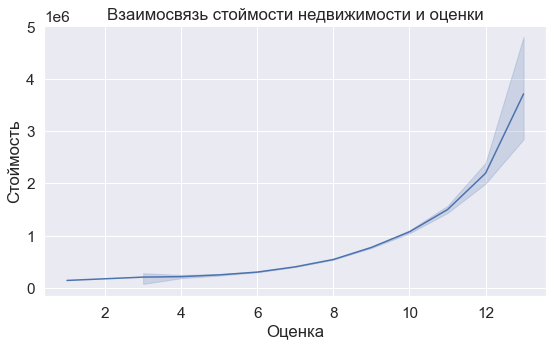

In [21]:
plt.figure(figsize=(9, 5))
sns.lineplot(x=df['grade'],y = df['price']);
plt.title('Взаимосвязь стоймости недвижимости и оценки');
plt.xlabel('Оценка')
plt.ylabel('Стоймость');

### Выводы
Наблюдаем, что стоймость линейно зависит от оценки недвижимости. Но сильное влияние наблюдается только после оценки **6**